https://people.duke.edu/~ccc14/sta-663/MonteCarlo.html

https://towardsdatascience.com/monte-carlo-integration-in-python-over-univariate-and-multivariate-functions-12615dd252fa

1. 积分
2. 模拟退火 函数优化

# 蒙特卡罗算法
---

[蒙特卡罗方法](https://zh.wikipedia.org/wiki/蒙地卡羅方法)（Monte Carlo method），也称统计模拟方法，是一种以概率统计理论为指导的数值计算方法。它使用随机数（或更常见的伪随机数）来解决科学和工程中的很多计算问题。 

通常蒙特卡罗方法可以粗略地分成两类：

1. 一类是所求解的问题本身具有内在的随机性，借助计算机的运算能力可以直接模拟这种随机的过程。例如模拟核裂变过程。
2. 另一种类型是所求解问题可以转化为某种随机分布的特征数，比如随机事件出现的概率，或者随机变量的期望值。通过随机抽样的方法，以随机事件出现的频率估计其概率，或者以抽样的数字特征估算随机变量的数字特征，并将其作为问题的解。例如求解复杂的多维积分问题。

**示例** 使用蒙特卡罗方法估算$\pi$值

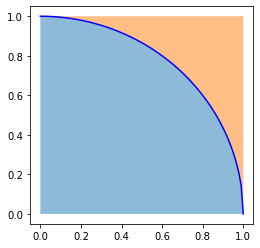

In [1]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(4, 4))
x = np.linspace(0,1,100)
y = np.sqrt(1 - x**2)
ax.plot(x, y, c='b')
ax.fill_between(x, 0, y, alpha=0.5)
ax.fill_between(x, y, 1, alpha=0.5)

In [8]:
from ipywidgets import interactive

np.random.seed(0)

def pi(n):
    N = 10**n
    x = np.random.random(N)
    y = np.random.random(N)
    dist = x**2 + y**2
    pi = np.sum(dist < 1) / N * 4
    X = np.linspace(0,1,100)
    Y = np.sqrt(1 - X**2)
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.plot(X, Y, c='b')
    ax.scatter(x, y, s=1, alpha=0.5)
    plt.show()
    print('Number of Data Point  %d' %(N))
    print('Estimate Value of Pi  %f' %(pi))

interact_plot = interactive(pi, n=(1, 7))
interact_plot

interactive(children=(IntSlider(value=4, description='n', max=7, min=1), Output()), _dom_classes=('widget-inte…

## 伪随机数生成器（PRNG）
---

经典计算机的数据都是由确定性算法生成的，因此随机数生成算法只能得到伪随机数序列。虽然伪随机数并不真正的随机，但具有类似于随机数的统计特征，如均匀性、独立性等。真正的随机数必须使用专门的设备，比如热噪信号、用户按键盘的位置与速度、移动设备加速度传感器等，或者使用量子计算机。

密码学中使用伪随机数要小心，其可计算性是一个可以攻击的地方。统计学、蒙特卡罗方法上使用的伪随机数也必须挑选周期极长、随机性够高的随机函数，以确保计算结果有足够的随机性。 

### 线性同余发生器（LCG）

[线性同余发生器](https://zh.wikipedia.org/wiki/線性同餘方法)是一种能产生具有不连续计算的**均匀分布**伪随机序列的分段线性方程的算法。它的递推公式是：
$$N_{{j+1}}\equiv (A\times N_{j}+B){\pmod  {M}}$$
其中参数为乘数$A$、增量$B$和模数$M$。

Hull-Dobell定理：当且仅当满足以下条件时，LCG序列的周期最大（最大周期为M）：

1. $B$和$M$互质
2. $A-1$可以被$M$的所有质因数整除
3. 如果$M$是4的倍数，则$A-1$也需要是4的倍数

序列的初始值$N_0$被称为*种子*。LCG算法通常被设计为返回$z/m$，即[0, 1]区间的浮点数。

In [3]:
def lcg(m=2**32, a=1103515245, c=12345):
    lcg.current = (a*lcg.current + c) % m
    return lcg.current/m

# setting the seed
lcg.current = 1

[lcg() for i in range(10)]

[0.25693503906950355,
 0.5878706516232342,
 0.15432575810700655,
 0.767266943352297,
 0.9738139626570046,
 0.5858681506942958,
 0.8511155843734741,
 0.6132153405342251,
 0.7473867232911289,
 0.06236015981994569]

### 逆变换采样

[逆变换采样](https://zh.m.wikipedia.org/zh-hans/逆变换采样)是伪随机数采样的一种基本方法。在已知**任意概率分布**的累积分布函数时，可用于从该分布中生成随机样本。 

In [4]:
def expon_pdf(x, lmabd=1):
    """指数分布的概率密度函数"""
    return lmabd*np.exp(-lmabd*x)

In [5]:
def expon_cdf(x, lambd=1):
    """指数分布的累积分布函数"""
    return 1 - np.exp(-lambd*x)

In [6]:
def expon_icdf(p, lambd=1):
    """指数分布的累积分布函数逆函数，即分位函数"""
    return -np.log(1-p)/lambd

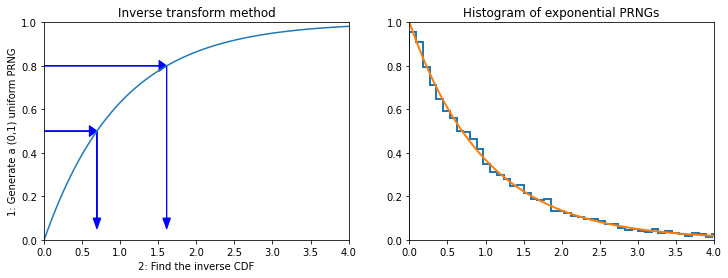

In [7]:
import scipy.stats as stats

dist = stats.expon()
x = np.linspace(0,4,100)
y = np.linspace(0,1,100)

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(x, expon_cdf(x))
plt.axis([0, 4, 0, 1])
for q in [0.5, 0.8]:
    plt.arrow(0, q, expon_icdf(q)-0.1, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
    plt.arrow(expon_icdf(q), q, 0, -q+0.1, head_width=0.1, head_length=0.05, fc='b', ec='b')
plt.ylabel('1: Generate a (0,1) uniform PRNG')
plt.xlabel('2: Find the inverse CDF')
plt.title('Inverse transform method');

plt.subplot(122)
u = np.random.random(10000)
v = expon_icdf(u)
plt.hist(v, histtype='step', bins=100, density=True, linewidth=2)
plt.plot(x, expon_pdf(x), linewidth=2)
plt.axis([0,4,0,1])
plt.title('Histogram of exponential PRNGs');

## 蒙特卡罗积分
---

